<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#PROBLEM" data-toc-modified-id="PROBLEM-1">PROBLEM</a></span></li><li><span><a href="#COLLECTING-EMPLOYEE-INFORMATION" data-toc-modified-id="COLLECTING-EMPLOYEE-INFORMATION-2">COLLECTING EMPLOYEE INFORMATION</a></span></li><li><span><a href="#DATA-ANALYSIS" data-toc-modified-id="DATA-ANALYSIS-3">DATA ANALYSIS</a></span></li><li><span><a href="#INSIGHTS-FROM-'COMPLAINT'-FEATURES" data-toc-modified-id="INSIGHTS-FROM-'COMPLAINT'-FEATURES-4">INSIGHTS FROM 'COMPLAINT' FEATURES</a></span><ul class="toc-item"><li><span><a href="#Here-is-a-summary-of-the-guard-complaints." data-toc-modified-id="Here-is-a-summary-of-the-guard-complaints.-4.1">Here is a summary of the guard complaints.</a></span></li><li><span><a href="#Guards-talking-about-each-problem." data-toc-modified-id="Guards-talking-about-each-problem.-4.2">Guards talking about each problem.</a></span></li></ul></li><li><span><a href="#INSIGHTS-FROM-OTHER-FEATURES" data-toc-modified-id="INSIGHTS-FROM-OTHER-FEATURES-5">INSIGHTS FROM OTHER FEATURES</a></span><ul class="toc-item"><li><span><a href="#Duration" data-toc-modified-id="Duration-5.1">Duration</a></span></li><li><span><a href="#Relgion" data-toc-modified-id="Relgion-5.2">Relgion</a></span></li><li><span><a href="#English" data-toc-modified-id="English-5.3">English</a></span></li><li><span><a href="#Age" data-toc-modified-id="Age-5.4">Age</a></span></li><li><span><a href="#Level-of-Education" data-toc-modified-id="Level-of-Education-5.5">Level of Education</a></span></li><li><span><a href="#Supervisor-Performance" data-toc-modified-id="Supervisor-Performance-5.6">Supervisor Performance</a></span></li><li><span><a href="#Dressing" data-toc-modified-id="Dressing-5.7">Dressing</a></span></li><li><span><a href="#Churn-in-3-months" data-toc-modified-id="Churn-in-3-months-5.8">Churn in 3 months</a></span></li><li><span><a href="#Number-of-Complaints" data-toc-modified-id="Number-of-Complaints-5.9">Number of Complaints</a></span></li></ul></li><li><span><a href="#RELATIONSHIPS" data-toc-modified-id="RELATIONSHIPS-6">RELATIONSHIPS</a></span><ul class="toc-item"><li><span><a href="#Relationship-between-'Age'-and-'Number-of-Complaint'-features?" data-toc-modified-id="Relationship-between-'Age'-and-'Number-of-Complaint'-features?-6.1">Relationship between 'Age' and 'Number of Complaint' features?</a></span></li><li><span><a href="#Relationship-between-'Duration'-and-'Number-of-Complaint'-features?" data-toc-modified-id="Relationship-between-'Duration'-and-'Number-of-Complaint'-features?-6.2">Relationship between 'Duration' and 'Number of Complaint' features?</a></span></li><li><span><a href="#Relationship-between-'Duration'-and-'Age'-features?" data-toc-modified-id="Relationship-between-'Duration'-and-'Age'-features?-6.3">Relationship between 'Duration' and 'Age' features?</a></span></li></ul></li><li><span><a href="#SUMMARY" data-toc-modified-id="SUMMARY-7">SUMMARY</a></span></li></ul></div>

## PROBLEM

The Managing Director of a certain company wants to know the dominant problems that her employees(guards) have, so she can put in place measures to solve them. This notebook seeks to solve this problem using various techniques.

## COLLECTING EMPLOYEE INFORMATION
In this part of the notebook, I import a Guard class for **guard.py** and persist every instance of the guard class using a dictionary. The dictionary is then serialized into a guard.dat file for future reference. The code is mostly supposed to assist in the entry of guard data.

In [96]:
from guard import Guard
import pickle

## Global constants for menu choices
LOOK_UP, ADD, CHANGE, DELETE, QUIT = 1, 2, 3, 4, 5

# Global constant for filename
FILENAME = 'guards.dat'

## main function 
def main():
    ## load the existing guards dictionary and assign it to my contacts
    myGuards = load_guards()
    
    ## Initialize a variable for my choice
    choice = 0
    
    ## Process the menu selections until I want to quit the program
    while choice != QUIT:
        ## Get menu choices
        choice = get_menu_choice()
        
        ## Process the choice
        if choice == LOOK_UP:
            look_up(myGuards)
            
        if choice == ADD:
            add(myGuards)
            
        if choice == CHANGE:
            change(myGuards)
            
        if choice == DELETE:
            delete(myGuards)
            
    ## save myGuards dictionary to a file
    save_guards(myGuards)
    
    
def load_guards():
    try:
        ## open the guard.dat file
        input_file = open(FILENAME, 'rb')
        
        ## unpickle the dictionary
        guard_dict = pickle.load(input_file)
        
        ## close the guard_inventory.dat file
        input_file.close()
        
    except IOError:
        ## Could not open file so create a new dictionary
        guard_dict = {}
        
    except EOFError:
        guard_dict = {}
        
    return guard_dict



def get_menu_choice():
    print()
    print('Menu')
    print('----------------------')
    print('1. Look up a guard')
    print('2. Add a new guard')
    print('3. Change an existing guard')
    print('4. Delete a guard')
    print('5. Quit the program')
    print()
    
    
    ## Get the user's choice
    choice = input('Enter your choice: ')
    
    
    while True:
        try:
            choice = int(choice)
            assert (choice < 6 and choice > 0)
            
        except AssertionError:
            print('select choice within specified range')
            choice = input('choice: ')
            print()
            

        except ValueError:
            print()
            print('choice should be an integer')
            choice = input('choice: ')
            print()
            

        else:
            break

    return choice


def look_up(myGuard):
    ## Get the id to look up
    id = input('Enter an id: ')
    
    ## Look it up in the dictionary
    print(myGuard.get(id, 'That name is not found'))


def add(myGuard):
    ## get guard information
    id_ = input("Please enter guard's id: ")
    while id_ in myGuard:
        print('this already exits')
        id_ = input('Please enter another id: ')
        
    duration = input("How long has the guard been with the company?: ")
    religion = input("What is the guard's religion: ")
    english= input("Does the guard speak english?: ")
    age = input('How old is the guard?: ')
    level_ed = input("What's the highest level of education of the guard: ")
    super_perf = input("What is the average supervisor performance: ")
    dressed = input('Was the guard dressed well: ')
    exited = input("Does the guard think he will churn in the next 3 months?: ")
    complaint1 = input('Guard Complaint #1 :')
    complaint2 = input('Guard Complaint #2 :')
    complaint3 = input('Guard Complaint #3 :')
    complaint4 = input('Guard Complaint #4 :')
    complaint5 = input('Guard Complaint #5 :')
    complaint6 = input('Guard Complaint #6 :')
    complaint7 = input('Guard Complaint #7 :')
    
    
    ## create guard instance
    entry = Guard(id_=id_, duration=duration, religion=religion, english=english, age=age, lev_ed=level_ed, super_perf=super_perf, dressed=dressed, \
                 exited=exited, complaint1=complaint1, complaint2=complaint2, complaint3=complaint3, complaint4=complaint4, complaint5=complaint5, \
                 complaint6=complaint6, complaint7=complaint7)
    
    if id_ not in myGuard:
        myGuard[id_] = entry
        
    else:
        print('this id already exists')
        

def change(myGuard):
    ## Get the name to look up
    id_ = input('Enter an id: ')
    
    if id_ in myGuard:
        ## Get new attributes
        duration = input("How long has the guard been with the company?: ")
        religion = input("What is the guard's religion: ")
        english= input("Does the guard speak english?: ")
        age = input('How old is the guard?: ')
        level_ed = input("What's the highest level of education of the guard: ")
        super_perf = input("What is the average supervisor performance: ")
        dressed = input("Was the guard dressed well?: ")
        exited = input("Does the guard think he will churn in the next 3 months?: ")
        complaint1 = input('Guard Complaint #1: ')
        complaint2 = input('Guard Complaint #2: ')
        complaint3 = input('Guard Complaint #3: ')
        complaint4 = input('Guard Complaint #4: ')
        complaint5 = input('Guard Complaint #5: ')
        complaint6 = input('Guard Complaint #6: ')
        complaint7 = input('Guard Complaint #7: ')

        
        ## create guard object
        entry = Guard(id_=id_, duration=duration, religion=religion, english=english, age=age, lev_ed=level_ed, super_perf=super_perf, dressed=dressed, \
                 exited=exited, complaint1=complaint1, complaint2=complaint2, complaint3=complaint3, complaint4=complaint4, complaint5=complaint5, \
                 complaint6=complaint6, complaint7=complaint7)
        
        ## update the entry
        myGuard[id_]  = entry
        print('Information updated')
        
        
    else: 
        print('That id is not found')
        
        
        
        
def delete(myGuard):
    ## Get the id to look up
    id = input('Enter an id: ')
    
    if id in myGuard:
        del myGuard[id]
        print('Entry deleted')
        
    else:
        print('That id is not found')
        
        
        
def save_guards(myGuard):
    ## Open file for writing
    output_file = open(FILENAME, 'wb')
    
    ## Pickle the dictionary
    pickle.dump(myGuard, output_file)
    
    ## close the file
    output_file.close()
    
    
    
main()


Menu
----------------------
1. Look up a guard
2. Add a new guard
3. Change an existing guard
4. Delete a guard
5. Quit the program

Enter your choice: 5


I've been able to persist all the guards, now I want to perform some data analysis.

## DATA ANALYSIS
Here, I'll try to put my data in a tabular form for easy analysis.

In [526]:
## Let's load the dictionary from the guards.dat file
guard_dict = load_guards()

## now let's create a dataframe from all this data
## create empty lists for guard variables
duration, religion, english, age, level_ed, super_perf, dressed, exited, complaint1, complaint2, \
complaint3, complaint4, complaint5, complaint6, complaint7  = [], [], [], [], [], [], [], [], [], [], [], [], \
[], [], []

columns = ['Duration', 'Religion', 'English', 'Age', 'Level of Education', 'Supervisor Performance', 'Good Dressing', \
           'Churn in 3months', 'complaint1', 'complaint2', 'complaint3', 'complaint4', 'complaint5', 'complaint6', \
           'complaint7']

guard_arr = []


## grouping like terms among instances
for idx, val in guard_dict.items():
    guard = [val.get_duration(), val.get_religion(), val.get_english(), val.get_age(), \
             val.get_levelOfEducation(), val.get_supervisorPerformance(), val.get_dressed(), val.get_exited(), \
             val.get_complaint1(), val.get_complaint2(), val.get_complaint3(), val.get_complaint4(), \
             val.get_complaint5(), val.get_complaint6(), val.get_complaint7()]

    
    guard_arr.append(guard)
    


# now let's create the dataFrame
import pandas as pd
guard_df = pd.DataFrame(guard_arr)

## drop inaccurate sample by row number
guard_df = guard_df.drop(guard_df.index[13])

## specify frame columns
guard_df.columns = columns

## let's save this data to some csv file
guard_df.to_csv('guard_data.csv', index=False)

## let's read it back in to be sure it worked
guard_df = pd.read_csv('guard_data.csv')   

I made a mistake while inputting the guard data - i typed 'none ' instead of 'none' in some instances. I also forgot to count the number of complaints each guard had, so i'll create a new column for that and append it to the dataframe using the following code.

In [ ]:
## get the number of complaints for each sample
num_of_complaints = []

for idx in range(len(guard_df)):
    ## select the row
    rowOfInterest = np.array(guard_df.loc[idx][8:15])
    
    ## cleaning up the data a bit
    rowOfInterest[rowOfInterest == 'none '] = 'none' 
    
    ## count number of columns
    not_none = rowOfInterest[(rowOfInterest != 'none')].shape[0]
    
    ## append to num_of_complaints array
    num_of_complaints.append(not_none)
    
## let's append this to our dataframe
guard_df['Number of Complaints'] = num_of_complaints

## let's update the csv file
guard_df.to_csv('guard_data.csv', index=False)

## reading it back in to make sure it works
guard_df

I will not be able to do any numerical analysis on the features that contain the complaints. However, i'll look through to grab the most dominant and significant complaints.

In [202]:
guard_df

,Duration,Religion,English,Age,Level of Education,Supervisor Performance,Good Dressing,Churn in 3months,complaint1,complaint2,complaint3,complaint4,complaint5,complaint6,complaint7,Number of Complaints
0,8.00,c,y,none,none,moderate,y,y,irregular change of work accoutrements,late date of payment,inconsistent SSNIT payments,none,none,none,none,3
1,0.50,c,y,26,none,good,y,y,lack of first aid,lack of incentives,insufficient rest days,insufficient uniforms,insufficient monthly salary,none,none,5
2,12.00,c,y,64,6th Form,moderate,y,n,late date of payment,"no reflectors, boots and raincoats",insufficient uniforms,revision of contract agreement,none,none,none,4
3,11.00,c,y,37,jss,good,y,n,insufficient monthly salary for old guards,insufficient rest days,irregular change of work accoutrements,difficulty in taking leave,no incentives,bad quality of uniforms,late date of payment,7
4,0.17,c,y,24,jss,good,y,y,no form of defense,bad quality of uniforms,insufficient monthly salary,no interest in guard welfare,none,none,none,4
5,1.50,c,y,41,jss,good,y,n,lack of education about salary,insufficient monthly salary,"bad quality of chairs, boots, reflectors and g...",none,none,none,none,3
6,2.00,c,y,24,shs,good,y,none,insufficient monthly salary,no form of defense,late date of payment,no incentives,no christmas gifts,insufficient rest days,no first aid,7
7,0.17,c,y,29,shs,good,y,n,no first aid,insufficient uniforms,insufficient rest days,insufficient monthly salary,none,none,none,4
8,0.25,none,y,24,shs,good,y,n,insufficient rest days,late date of payment,insufficient monthly salary,none,none,none,none,3
9,3.00,none,y,27,shs,good,y,y,bad quality of uniforms,no boots or reflectors,no incentives,insufficient monthly salary,insufficient rest days,no interest in guard welfare,none,6


## INSIGHTS FROM 'COMPLAINT' FEATURES
I'll now analyse the complaints the guards produced and get some insights.

### Here is a summary of the guard complaints. 
- Irregular change of work accoutrements.
- No first aid.
- Late date of payment
- Insufficient monthly salary.
- No form of defense.
- Lack of education concerning the monthly salary.
- Insufficient rest days.
- Bad quality of uniforms, reflectors and boots.
- No job rotation
- No incentives
- Lack of respect for security rules.
- Provision of oversized boots.
- Introduction of welfare program.
- Difficulty in taking a leave
- Inconsistency in SSNIT payments.
- No respect for young guards.
- Long distance from work.
- Revision of Contract agreement.
- No interest in guard welfare.
- Mosquitoes
- Insufficient overtime premiums
- No Christmas gifts.
- Ineffective deployment by the head office.
- Late receipt of payslips.


Hopefully, I'll be able to solve at least 50% of these problems.

### Guards talking about each problem.
So I started looking through the complaints, and I got tired minutes after. I decided to develop some algorithm to help me - I used some keywords while I was describing each complaint. I'll now use those keywords to find the accurate number of guards talking about each problem.

In [275]:
from collections import Counter
## let's grab all the keys
def guard_talking(keyword):
    complaint_arr = ['complaint1', 'complaint2', 'complaint3', 'complaint4', 'complaint5', 'complaint6', 'complaint7']
    times_showing = []
    for complaint in complaint_arr:
        dict_ = Counter(guard_df[complaint])
        keys = [keys for keys in dict_]
        for key in keys:
            if keyword in key:
#                 print(key)
                times_showing.append(dict_[key])
                
    times_showing = np.array(times_showing).sum()
    
    return times_showing


Awesome, works like a charm. I'll now use this function on the complaints. I'll create a list to store the number of guards per complaint for a dataframe I'll create later.

In [293]:
guards_talking = []

keywords_list = ['accoutrements', 'aid', 'date', 'salary', 'defense', 'education', 'days', 'boots','rotation', 'incentives', \
                'rules', 'oversized', 'introduction', 'leave', 'SSNIT', 'young', 'distance', 'revision', \
                 'guard welfare', 'mosquitoes', 'premiu', 'gift', 'head office', 'payslip']

for keyword in keywords_list:
    numOfGuardsTalking = guard_talking(keyword)
    guards_talking.append(numOfGuardsTalking)

## let's make our dataframe
complaints_ = [
    'Irregular change of work accoutrements',
    'No first aid',
    'Late date of payment',
    'Insufficient monthly salary',
    'No form of defense',
    'Lack of education concerning the monthly salary',
    'Insufficient rest days',
    'Bad quality of uniforms, reflectors and boots',
    'No job rotation',
    'No incentives',
    'Lack of respect for security rules',
    'Provision of oversized boots',
    'Introduction of welfare program',
    'Difficulty in taking a leave',
    'Inconsistency in SSNIT payments',
    'No respect for young guards',
    'Long distance from work',
    'Revision of Contract agreement',
    'No interest in guard welfare',
    'Mosquitoes',
    'Insufficient overtime premiums',
    'No Christmas gifts',
    'Ineffective deployment by the head office',
    'Late receipt of payslips'
]

guards_talking[3] = 20

## let's check if everything matches
len(complaints_) == len(guards_talking)

## now let's create the dataframe
complaints_df = pd.DataFrame({'Complaint': complaints_, 'Number of Guards Talking About Complaint': guards_talking})
complaints_df.to_csv('complaints.csv', index=False)





,Complaint,Number of Guards Talking About Complaint
0,Irregular change of work accoutrements,2
1,No first aid,3
2,Late date of payment,13
3,Insufficient monthly salary,20
4,No form of defense,2


All done, I can now analyze the rest of the data. Before that, I'll summarize my findings visually.

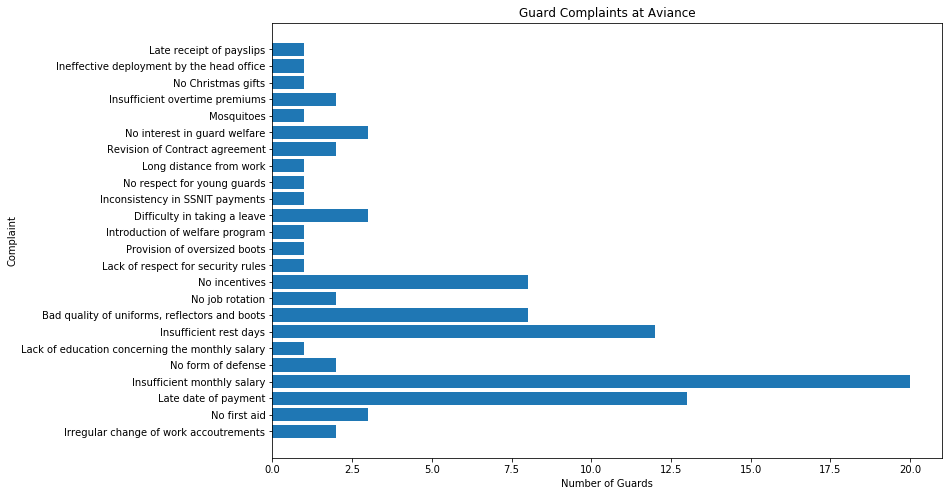

In [498]:
from matplotlib import pyplot as plt
complaints_df = pd.read_csv('complaints.csv')
fig = plt.figure(figsize=(12, 8))
plt.barh(complaints_df['Complaint'], complaints_df['Number of Guards Talking About Complaint'] )
plt.xlabel('Number of Guards')
plt.ylabel('Complaint')
plt.title('Guard Complaints at Aviance')
plt.show()

Looks like most of the guards are talking about their monthly salary.

## INSIGHTS FROM OTHER FEATURES
Previously I dealt with the so called complaint features, so now I'll deal with the others.

### Duration
Mean time a guard serves the company is 4years. For this dataset, I'll say that's not bad.

Mean Duration of a guard: 4 years
Longest serving guard: 12 years


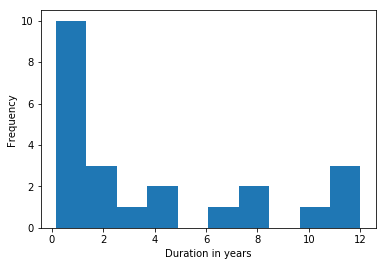

In [353]:
guard_df['Duration'].describe()
print('Mean Duration of a guard: %.0f years'%(guard_df['Duration'].describe()['mean']))
print('Longest serving guard: %0.f years'%(guard_df['Duration'].describe()['max']))


## let's also take a look at the distribution using a histogram
plt.hist(guard_df['Duration'])
plt.xlabel('Duration in years')
plt.ylabel('Frequency')
plt.show()

I see that most of the guards have spent between **0 to 2 years** in the company. Very few of the guards have spent **more than 6 years**.

### Relgion
The Guards are predominantly **Christian**.

In [349]:
christian = guard_df['Religion']
print('%.3f%% of the guards are Christian'%(guard_df[christian == 'c'].shape[0] / len(christian) * 100))

91.304% of the guards are Christian


### English
All the guards also speak english, also very nice.

### Age
It is clear that the average guard who works with the company at this location is around 30 years and has worked with the company for 4 years. Interesting.

Mean age of a guard is 31.476 years
The Oldest guard is 64.000 years


[]

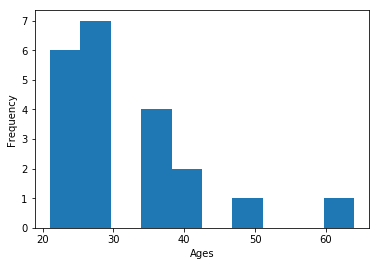

In [368]:
age = np.array(guard_df['Age'][guard_df['Age'] != 'none'])
print('Mean age of a guard is %.3f years' % np.mean(age.astype(int)))
print('The Oldest guard is %.3f years' % np.max(age.astype(int)))

age = age.astype(int)
plt.hist(age, bins=10)
plt.xlabel('Ages')
plt.ylabel('Frequency')
plt.plot()

### Level of Education
The values are with respect to the guards whose level of Education is known.

In [381]:
lev_ed = np.array(guard_df['Level of Education'][guard_df['Level of Education'] != 'none'])

# form 4 guards
form4 = lev_ed[lev_ed == 'Form 4']
jss = lev_ed[lev_ed == 'jss']
shs = lev_ed[lev_ed == 'shs']
print('%.2f%% of guards are Form 4 leavers'%(form4.shape[0] / len(guard_df)*100))
print('%.2f%% of guards finished jss'%(jss.shape[0] / len(guard_df)*100))
print('%.2f%% of guards finished shs'%(shs.shape[0] / len(guard_df)*100))

4.35% of guards are Form 4 leavers
21.74% of guards finished jss
60.87% of guards finished shs


### Supervisor Performance
Let's see what the guards think of their **supervisors** collectively.

In [392]:
sup_perf = np.array(guard_df['Supervisor Performance'][guard_df['Supervisor Performance'] != 'none'])

perf = "moderate good".split()

for performance in perf:
    print('%.2f%% of the guards think their supervisors have a '% (sup_perf[sup_perf == performance].shape[0] / 23 *100) + performance + ' performance')

## Looks like the supervisors are doing a good job.

26.09% of the guards think their supervisors have a moderate performance
73.91% of the guards think their supervisors have a good performance


### Dressing
All the guards were well dressed during the survey.

### Churn in 3 months
16 people responsed to the question of churning in the next 3 months. Let's see the number of guards that think they would have churned after 3 months, if of course, nothing is done about the complaints.

In [527]:
churn = np.array(guard_df['Churn in 3months'])
churn[churn == 'none '] = 'none'

churn = churn[churn != 'none']

## let's now grab the number of yes' and no's
yes_churn = churn[churn == 'y'].shape[0]
no_churn= churn[churn == 'n'].shape[0]

print('%d of %d guards think they will churn in the next 3 months.' %(yes_churn, churn.shape[0]))
print('%d of %d guards think they will not churn in the next 3 months.' %(no_churn, churn.shape[0]))

## I think that is good news.

4 of 16 guards think they will churn in the next 3 months.
12 of 16 guards think they will not churn in the next 3 months.


### Number of Complaints
Looks like every guard indeed has something to say about their working conditions.

In [420]:
numOfComplaints = np.array(guard_df['Number of Complaints'])
moreThan3 = numOfComplaints[numOfComplaints >= 3].shape[0]

## so just 3 guards have less than complaints
print('All guards except %d'%(23-moreThan3) + ' have more than 3 complaints')

## mean number of complaints per guard
print('Each guard has a mean of %0.f complaints'% np.mean(numOfComplaints))

## highest number of complaints
print('Highest number of complaints is %d' % np.max(numOfComplaints))

All guards except 3 have more than 3 complaints
Each guard has a mean of 4 complaints
Highest number of complaints is 7


## RELATIONSHIPS
I will investigate relationships between the continuous variables.

In [528]:
from itertools import combinations
continuous_variables = "duration age number_of_complaints".split()
dichotomous_variables = "supervisor_performance churn_In_3months".split()

## I will investigate relationships between the continuous variables
for combos in combinations(continuous_variables, 2):
    print(combos)
    
## I have 3 relationships to explore
    
    

('duration', 'age')
('duration', 'number_of_complaints')
('age', 'number_of_complaints')


### Relationship between 'Age' and 'Number of Complaint' features?
I want to check, with a scatter plot if there's some sort of relationship between these 2 features.

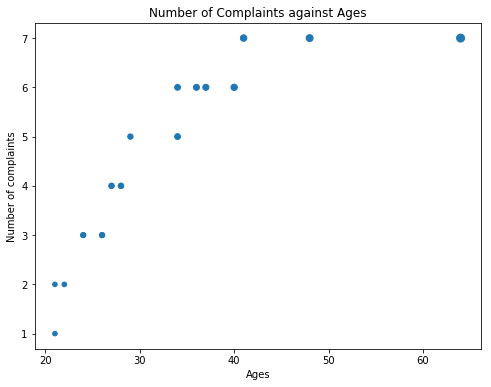

In [506]:
fig = plt.figure(figsize=(8, 6))
age_numOfComplaints = guard_df[['Age', 'Number of Complaints']]

axis_ = age_numOfComplaints[age_numOfComplaints['Age'] != 'none']

## let's sort 'Number of complaints before plotting'
sort_complaints = sorted(np.array(axis_['Number of Complaints']).astype(int))
sort_age = sorted(np.array(axis_['Age']).astype(int))

plt.scatter(sort_age, sort_complaints, marker='o', s=sort_age)
plt.ylabel('Number of complaints')
plt.xlabel('Ages')
plt.title('Number of Complaints against Ages')
plt.show()


If you look closely, you'll see that the number of complaints increases with age. A very interesting insight as well. I'll now investigate the relationship between duration and Number of complaints.

### Relationship between 'Duration' and 'Number of Complaint' features?

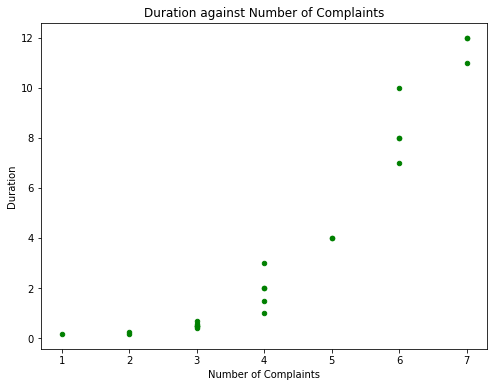

In [521]:
fig = plt.figure(figsize=(8, 6))
duration_numOfComplaints = guard_df[['Duration', 'Number of Complaints']]

# great, no 'none' entries, i'll jump right in
# sorting
sort_duration = sorted(np.array(duration_numOfComplaints['Duration']).astype(float))
sort_complaints = sorted(np.array(duration_numOfComplaints['Number of Complaints']).astype(int))

## plotting
plt.scatter(sort_complaints, sort_duration, marker='o', s=20, c='green')
plt.xlabel('Number of Complaints')
plt.ylabel('Duration')
plt.title('Duration against Number of Complaints')
plt.show()

I can also see that, the ***longer*** you work with the company, the ***more complaints*** you'll have. I'll now move on to the last relationship I have to explore.

### Relationship between 'Duration' and 'Age' features?

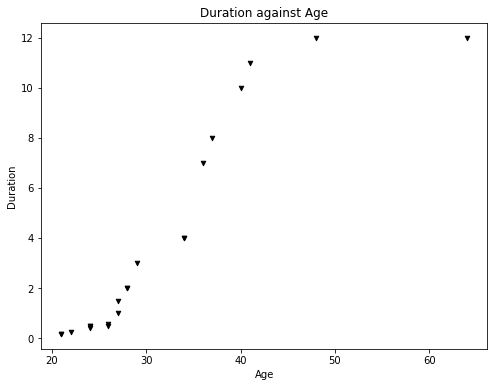

In [529]:
fig = plt.figure(figsize=(8, 6))
duration_age = guard_df[['Duration', 'Age']]

duration_age = duration_age[duration_age['Age'] != 'none']

## sorting
sort_duration = sorted(np.array(duration_age['Duration']).astype(float))
sort_age = sorted(np.array(duration_age['Age']).astype(int))


## plotting
plt.scatter(sort_age, sort_duration, marker='v', s=20, c='black')
plt.xlabel('Age')
plt.ylabel('Duration')
plt.title('Duration against Age')
plt.show()

Very interesting, looks like the old guards have served the company for a very long time (at least 4 years). I assumed that perhaps, there'd be one old guard (age > 30) who has not been around for that long, but it looks like I was wrong.

## SUMMARY
In this notebook:
- I developed an algorithm to facilitate the ease of ***data entry***. 
- I also analyzed the **most important information** in the dataset which is the guards' ***complaints*** using various algorithms.
- Finally, I summarized my findings visually, using a **simple bar chart**. To feed my curiosity, I also investigated **relationships** between the available continuous variables.